In [32]:
# 데이터분석
import pandas as pd
import numpy as np 

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc 

import os
import warnings
import random

# ML/DL 모델 및 sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 경고 끄기
warnings.filterwarnings(action='ignore')

from functools import reduce

# 데이터프레임 제한 풀기
# pd.set_option('display.max_row', 100)
# pd.set_option('display.max_columns', 150)
# pd.set_option('display.max_seq_items', None)

In [6]:
samil_df = pd.read_csv('data/Samil_feature_concat.csv').drop(columns=['Unnamed: 0'])

In [7]:
'''
# 전처리

# 날짜 형식 '-'로 맞추기

# def replace_month(data):
#     data.month = data.month.astype(str).str.replace('.','-')

# 날짜 이상하게 표시된 것 제거
df1.month.iloc[-3:] = df1.month.iloc[-3:].str.replace(' p\)','')

# 다 합해주기
from functools import reduce

dfs = [df, df1, df2, df3, df4, df5, df6, df7, df8] # df, df1, df4, df5, df6, df7, df8
df_merge = reduce(lambda left, right : pd.merge(left, right, on='month',how='outer'), dfs).sort_values('month')

# df_merge.reset_index().drop(columns=['index']).to_csv('feature.csv')

# df_merge = df_merge.drop(df_merge.index[-1])

# replace_month(df1)
# replace_month(df2)
# replace_month(df3)
# replace_month(df4)
# replace_month(df5)
# replace_month(df6)
# replace_month(df7)
# replace_month(df8)
'''

"\n# 전처리\n\n# 날짜 형식 '-'로 맞추기\n\n# def replace_month(data):\n#     data.month = data.month.astype(str).str.replace('.','-')\n\n# 날짜 이상하게 표시된 것 제거\ndf1.month.iloc[-3:] = df1.month.iloc[-3:].str.replace(' p\\)','')\n\n# 다 합해주기\nfrom functools import reduce\n\ndfs = [df, df1, df2, df3, df4, df5, df6, df7, df8] # df, df1, df4, df5, df6, df7, df8\ndf_merge = reduce(lambda left, right : pd.merge(left, right, on='month',how='outer'), dfs).sort_values('month')\n"

In [8]:
samil_df

,month,Samil_Close,Samil_Change,Kospi_Close,Kospi_Change,label,선행종합지수(2015=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2015=100),...,기타가구 (2015=100)_y,기타제조업제품 (2015=100)_y,기타제조업제품 (2015=100),총지수,식료품 및 에너지제외 지수,식료품 및 에너지,보통휘발유,실내등유,보일러등유,자동차용 경유
0,2000-01,0.166849,0.466341,0.166989,-0.003865,0.0,58.5,-,-,-,...,60.23,78.87,78.23,62.456,64.697,-,NaN,NaN,NaN,NaN
1,2000-02,0.151669,0.509320,0.150465,-0.006220,0.0,58.7,-,-,-,...,60.23,78.78,78.23,62.647,64.828,-,NaN,NaN,NaN,NaN
2,2000-03,0.283741,0.872881,0.141921,0.002064,0.0,59.0,-,-,-,...,60.23,78.84,78.23,62.962,65.286,-,NaN,NaN,NaN,NaN
3,2000-04,0.305151,0.329995,0.107834,-0.008667,1.0,58.8,-,-,-,...,60.23,78.87,78.23,62.709,65.352,-,NaN,NaN,NaN,NaN
4,2000-05,0.242085,0.337147,0.086009,0.000940,1.0,58.8,-,-,-,...,60.23,78.81,78.23,62.393,65.156,-,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2022-06,0.141677,0.283132,0.704787,-0.006930,0.0,129.2,-14.2,105.0,99.7,...,116.86,109.24,109.24,108.220,105.040,119.26,2084.00,1601.77,-,2089.03
292,2022-07,0.122400,0.520008,0.665200,0.002419,1.0,129.4,-15.4,102.3,103.0,...,116.86,121.19,121.19,108.740,105.430,120.23,2029.99,1686.55,-,2084.91
293,2022-08,0.139956,0.425427,0.707168,0.000423,0.0,129.5,-16.1,99.9,105.8,...,116.86,121.19,121.19,108.620,105.760,118.54,1792.19,1639.49,-,1889.31
294,2022-09,0.113694,0.317581,0.656375,-0.006745,0.0,NaN,NaN,NaN,NaN,...,116.86,121.19,121.19,108.930,105.710,120.12,1730.00,1620.15,-,1850.20


### 전처리

In [14]:
samil_df.columns

Index(['month', 'Samil_Close', 'Samil_Change', 'Kospi_Close', 'Kospi_Change',
       'label', ' 선행종합지수(2015=100)', '　　　 재고순환지표(%p)', '　　　 경제심리지수',
       '　　　 기계류내수출하지수(선박제외)(2015=100)',
       ...
       '　　　　　　　　　　　　　　　기타가구 (2015=100)_y', '　　　　　　　　　　　　기타제조업제품 (2015=100)_y',
       '　　　　　　　　　　　　　　　기타제조업제품 (2015=100)', '총지수', '식료품 및 에너지제외 지수',
       '식료품 및 에너지', '보통휘발유', '실내등유', '보일러등유', '자동차용 경유'],
      dtype='object', length=610)

In [15]:
# 컬럼 공백 제거
samil_df.columns = samil_df.columns.str.strip()

In [16]:
# '-' 값 Nan 값으로 변경
samil_df = samil_df.replace('-', np.nan)

In [17]:
samil_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 610 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    month                          296 non-null    object 
 1    Samil_Close                    274 non-null    float64
 2    Samil_Change                   274 non-null    float64
 3    Kospi_Close                    274 non-null    float64
 4    Kospi_Change                   274 non-null    float64
 5    label                          274 non-null    float64
 6    선행종합지수(2015=100)               272 non-null    float64
 7    재고순환지표(%p)                     236 non-null    object 
 8    경제심리지수                         236 non-null    object 
 9    기계류내수출하지수(선박제외)(2015=100)      236 non-null    object 
 10   건설수주액(실질)(십억원)                 236 non-null    object 
 11   수출입물가비율(2015=100)              236 non-null    object 
 12   코스피(1980.1.4=100)              236

In [18]:
# 앞에 값으로 결측치 처리
samil_df = samil_df.fillna(method='ffill')
samil_df = samil_df.fillna(method='bfill')


In [19]:
samil_df

,month,Samil_Close,Samil_Change,Kospi_Close,Kospi_Change,label,선행종합지수(2015=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2015=100),...,기타가구 (2015=100)_y,기타제조업제품 (2015=100)_y,기타제조업제품 (2015=100),총지수,식료품 및 에너지제외 지수,식료품 및 에너지,보통휘발유,실내등유,보일러등유,자동차용 경유
0,2000-01,0.166849,0.466341,0.166989,-0.003865,0.0,58.5,-0.4,101.4,88.7,...,60.23,78.87,78.23,62.456,64.697,85.829,1287.02,613.60,606.52,660.99
1,2000-02,0.151669,0.509320,0.150465,-0.006220,0.0,58.7,-0.4,101.4,88.7,...,60.23,78.78,78.23,62.647,64.828,85.829,1287.02,613.60,606.52,660.99
2,2000-03,0.283741,0.872881,0.141921,0.002064,0.0,59.0,-0.4,101.4,88.7,...,60.23,78.84,78.23,62.962,65.286,85.829,1287.02,613.60,606.52,660.99
3,2000-04,0.305151,0.329995,0.107834,-0.008667,1.0,58.8,-0.4,101.4,88.7,...,60.23,78.87,78.23,62.709,65.352,85.829,1287.02,613.60,606.52,660.99
4,2000-05,0.242085,0.337147,0.086009,0.000940,1.0,58.8,-0.4,101.4,88.7,...,60.23,78.81,78.23,62.393,65.156,85.829,1287.02,613.60,606.52,660.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2022-06,0.141677,0.283132,0.704787,-0.006930,0.0,129.2,-14.2,105.0,99.7,...,116.86,109.24,109.24,108.220,105.040,119.26,2084.00,1601.77,1357.0,2089.03
292,2022-07,0.122400,0.520008,0.665200,0.002419,1.0,129.4,-15.4,102.3,103.0,...,116.86,121.19,121.19,108.740,105.430,120.23,2029.99,1686.55,1357.0,2084.91
293,2022-08,0.139956,0.425427,0.707168,0.000423,0.0,129.5,-16.1,99.9,105.8,...,116.86,121.19,121.19,108.620,105.760,118.54,1792.19,1639.49,1357.0,1889.31
294,2022-09,0.113694,0.317581,0.656375,-0.006745,0.0,129.5,-16.1,99.9,105.8,...,116.86,121.19,121.19,108.930,105.710,120.12,1730.00,1620.15,1357.0,1850.20


In [20]:
samil_df.isnull().sum()

month           0
Samil_Close     0
Samil_Change    0
Kospi_Close     0
Kospi_Change    0
               ..
식료품 및 에너지       0
보통휘발유           0
실내등유            0
보일러등유           0
자동차용 경유         0
Length: 610, dtype: int64

## new_data 추가하기

In [283]:
# 금리, DJ 지수, NASDAQ 지수, S&P500 지수 추가

rate = pd.read_csv('data/금리.csv')
dj = pd.read_csv('data/DJI_1m.csv').drop(columns=['Unnamed: 0'])
nas = pd.read_csv('data/NASDAQ_1m.csv').drop(columns=['Unnamed: 0'])
sp = pd.read_csv('data/SP500_1m.csv').drop(columns=['Unnamed: 0'])

world_oil = pd.read_csv('data/국제유가08_22.csv').rename(columns={'date':'month'})#.drop(columns=['Unnamed: 0'])
usa_rate = pd.read_csv('data/미국금리.csv').rename(columns={'date':'month'})

In [285]:
usa_rate

,month,미국 금리
0,2000-01,0.0550
1,2000-02,0.0575
2,2000-03,0.0600
3,2000-04,0.0600
4,2000-05,0.0650
...,...,...
270,2022-04,0.0050
271,2022-05,0.0100
272,2022-06,0.0175
273,2022-07,0.0250


In [339]:
# month 기준으로 merge
dfs = [samil_df, rate, dj, nas, sp, world_oil, usa_rate] # df, df1, df4, df5, df6, df7, df8
df_merge = reduce(lambda left, right : pd.merge(left, right, on='month',how='outer'), dfs)#.sort_values('month')

In [340]:
df = df_merge.rename(columns={'Close_x':'DJI_Close','Close_y':'NASDAQ_Close','Close':'S&P500_Close'})

In [337]:
# df=df_merge

In [341]:
df

,month,Samil_Close,Samil_Change,Kospi_Close,Kospi_Change,label,선행종합지수(2015=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2015=100),...,NASDAQ_Close,S&P500_Close,휘발유(95RON),휘발유(92RON),등유,경유(0.001%),경유(0.05%),고유황중유(180cst/3.5%),나프타,미국 금리
0,2000-01,0.166849,0.466341,0.166989,-0.003865,0.0,58.5,-0.4,101.4,88.7,...,4013.493994,1425.585504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0550
1,2000-02,0.151669,0.509320,0.150465,-0.006220,0.0,58.7,-0.4,101.4,88.7,...,4410.871021,1388.874500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0575
2,2000-03,0.283741,0.872881,0.141921,0.002064,0.0,59.0,-0.4,101.4,88.7,...,4802.988260,1442.212599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0600
3,2000-04,0.305151,0.329995,0.107834,-0.008667,1.0,58.8,-0.4,101.4,88.7,...,3863.637400,1461.355257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0600
4,2000-05,0.242085,0.337147,0.086009,0.000940,1.0,58.8,-0.4,101.4,88.7,...,3528.416826,1418.479548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2022-06,0.141677,0.283132,0.704787,-0.006930,0.0,129.2,-14.2,105.0,99.7,...,11418.919085,3898.946684,155.20,148.85,164.32,176.83,168.54,99.05,84.34,0.0175
295,2022-07,0.122400,0.520008,0.665200,0.002419,1.0,129.4,-15.4,102.3,103.0,...,11622.631543,3911.729492,121.72,116.55,134.90,145.34,137.12,79.42,81.62,0.0250
296,2022-08,0.139956,0.425427,0.707168,0.000423,0.0,129.5,-16.1,99.9,105.8,...,12570.260403,4158.563084,110.90,107.19,132.20,139.70,134.29,78.22,71.99,0.0250
297,2022-09,0.113694,0.317581,0.656375,-0.006745,0.0,129.5,-16.1,99.9,105.8,...,11402.849981,3850.520496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [342]:
# new data의 '-', Nan 값 처리

df = df.replace('-', np.nan)
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

In [343]:
df

,month,Samil_Close,Samil_Change,Kospi_Close,Kospi_Change,label,선행종합지수(2015=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2015=100),...,NASDAQ_Close,S&P500_Close,휘발유(95RON),휘발유(92RON),등유,경유(0.001%),경유(0.05%),고유황중유(180cst/3.5%),나프타,미국 금리
0,2000-01,0.166849,0.466341,0.166989,-0.003865,0.0,58.5,-0.4,101.4,88.7,...,4013.493994,1425.585504,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0550
1,2000-02,0.151669,0.509320,0.150465,-0.006220,0.0,58.7,-0.4,101.4,88.7,...,4410.871021,1388.874500,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0575
2,2000-03,0.283741,0.872881,0.141921,0.002064,0.0,59.0,-0.4,101.4,88.7,...,4802.988260,1442.212599,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0600
3,2000-04,0.305151,0.329995,0.107834,-0.008667,1.0,58.8,-0.4,101.4,88.7,...,3863.637400,1461.355257,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0600
4,2000-05,0.242085,0.337147,0.086009,0.000940,1.0,58.8,-0.4,101.4,88.7,...,3528.416826,1418.479548,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2022-06,0.141677,0.283132,0.704787,-0.006930,0.0,129.2,-14.2,105.0,99.7,...,11418.919085,3898.946684,155.20,148.85,164.32,176.83,168.54,99.05,84.34,0.0175
295,2022-07,0.122400,0.520008,0.665200,0.002419,1.0,129.4,-15.4,102.3,103.0,...,11622.631543,3911.729492,121.72,116.55,134.90,145.34,137.12,79.42,81.62,0.0250
296,2022-08,0.139956,0.425427,0.707168,0.000423,0.0,129.5,-16.1,99.9,105.8,...,12570.260403,4158.563084,110.90,107.19,132.20,139.70,134.29,78.22,71.99,0.0250
297,2022-09,0.113694,0.317581,0.656375,-0.006745,0.0,129.5,-16.1,99.9,105.8,...,11402.849981,3850.520496,110.90,107.19,132.20,139.70,134.29,78.22,71.99,0.0250


In [57]:
# 월 평균값을 내셨다면 안해도 되는 코드들입니다.
# 데이터프레임에 월별주가평균, 코스피월별평균만 있으면 됩니다.
# 월 평균 값만 남기고 나머지 빈칸 있는 행 삭제
# df = pd.read_csv('data/9_emart주가_월평균.csv')
# df = df.dropna()
# df.date = pd.to_datetime(df.date)
# df['date'] = df['date'].dt.strftime('%Y-%m')
# df = df.set_index('date')
# df = df.reset_index('date')
'''
# 월 평균값 있을때
df = pd.read_csv('data/10_emart - 주가,코스피원본.csv')
df.date = pd.to_datetime(df.date)
df['date'] = df['date'].dt.strftime('%Y-%m')
df = df.set_index('date')
'''

# MinMaxScaler 데이터 정규화
scaler = MinMaxScaler()
df = df.set_index('month')
scaler.fit(df)
scaled = scaler.transform(df)
df_scaled = pd.DataFrame(scaled, columns=df.columns)

df = df.reset_index()
df_scaled.insert(0,'month', df['month'] )

df_scaled
# df = df.merge(df_scaled,how='left')
# df.head()

,month,Samil_Close,Samil_Change,Kospi_Close,Kospi_Change,label,선행종합지수(2015=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2015=100),...,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리,DJI_Close,NASDAQ_Close,S&P500_Close
0,2000-01,0.166849,0.466341,0.159749,0.307588,0.0,0.031378,0.437050,0.712329,0.245478,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.879346,0.894737,0.141397,0.190186,0.170628
1,2000-02,0.151669,0.509320,0.142720,0.199083,0.0,0.034106,0.437050,0.712329,0.245478,...,0.965680,0.946249,1.000000,0.972093,0.977444,0.928425,0.947368,0.115558,0.217454,0.161257
2,2000-03,0.283741,0.872881,0.133917,0.580746,0.0,0.038199,0.437050,0.712329,0.245478,...,0.973964,0.946249,1.000000,0.970930,0.957895,0.944785,0.947368,0.113512,0.244361,0.174872
3,2000-04,0.305151,0.329995,0.098791,0.086354,1.0,0.035471,0.437050,0.712329,0.245478,...,0.960947,0.919373,1.000000,0.967442,0.966917,0.944785,0.947368,0.129620,0.179903,0.179758
4,2000-05,0.242085,0.337147,0.076302,0.528975,1.0,0.035471,0.437050,0.712329,0.245478,...,0.962130,0.918253,1.000000,0.960465,0.978947,0.948875,0.947368,0.116898,0.156900,0.168814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2022-06,0.141677,0.283132,0.713928,0.166370,0.0,0.995907,0.188849,0.782779,0.529716,...,0.313609,0.286674,0.341429,0.300000,0.204511,0.259714,0.263158,0.846159,0.698346,0.801966
292,2022-07,0.122400,0.520008,0.673135,0.597121,1.0,0.998636,0.167266,0.729941,0.614987,...,0.285207,0.247480,0.292857,0.288372,0.267669,0.304703,0.368421,0.849256,0.712324,0.805229
293,2022-08,0.139956,0.425427,0.716381,0.505142,0.0,1.000000,0.154676,0.682975,0.687339,...,0.286391,0.247480,0.295714,0.300000,0.324812,0.364008,0.421053,0.900780,0.777351,0.868235
294,2022-09,0.113694,0.317581,0.664041,0.174894,0.0,1.000000,0.154676,0.682975,0.687339,...,0.286391,0.247480,0.295714,0.300000,0.324812,0.364008,0.421053,0.818300,0.697243,0.789605


In [291]:
a = 50
df_ = df[:a]

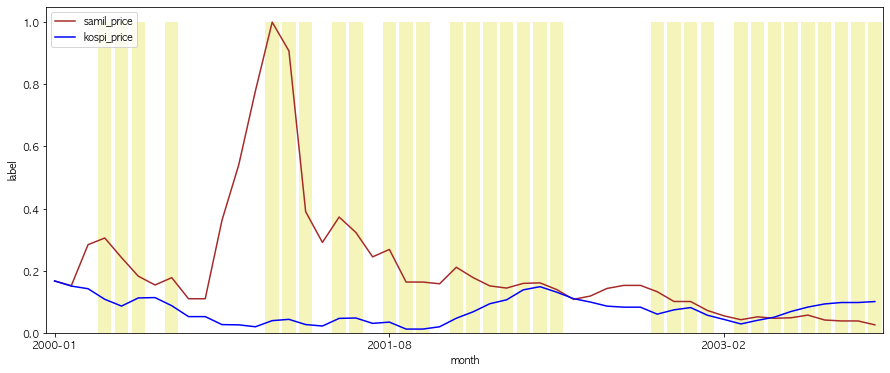

In [292]:
data = df_

# 주가 데이터 그래프
plt.figure(figsize=(15, 6))
plt.rcParams['font.family'] = 'AppleGothic'
ax = sns.lineplot(data=data, x="month", y='Samil_Close', label='samil_price', color='brown')
ax = sns.lineplot(data=data, x="month", y='Kospi_Close', label='kospi_price', color='blue')
ax = sns.barplot(data=data, x="month", y="label", label='↓', color = 'yellow', alpha  = 0.3)

total_len = len(data.index)
ax.set_xticks(np.arange(0, total_len + 1, 20))

plt.show()

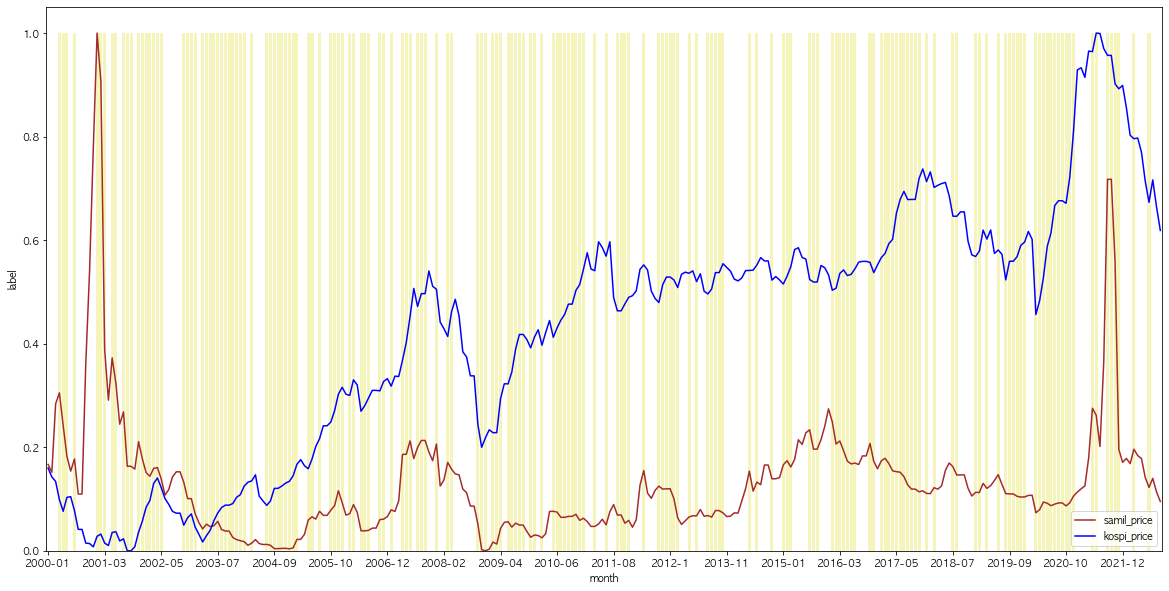

'\n# 주가 데이터 그래프\nplt.figure(figsize=(15, 6))\nplt.rcParams[\'font.family\'] = \'AppleGothic\'\n\nsns.lineplot(data=df, x="date", y="k_s - p_s", label=\'하락정도\')\nsns.scatterplot(data=df, x="date", y="downturn", label=\'주가하락세\')\nsns.lineplot(data=df, x="date", y="pricemm", label=\'price_minmax\')\nsns.lineplot(data=df, x="date", y="kospimm", label=\'kospi_minmax\')\n\nplt.ylabel(\'\')\nplt.xticks(rotation=45)\n\nplt.show()\n'

In [384]:
# 주가 데이터 그래프

data = df_scaled

plt.figure(figsize=(20, 10))
plt.rcParams['font.family'] = 'AppleGothic'

# plt.subplot(2, 1, 1)
# plt.axhline(y=0, color='black', linewidth=1)
ax = sns.lineplot(data=data, x="month", y='Samil_Close', label='samil_price', color='brown')
ax = sns.lineplot(data=data, x="month", y='Kospi_Close', label='kospi_price', color='blue')
ax = sns.barplot(data=data, x="month", y="label", label='↓', color = 'yellow', alpha  = 0.3)

'''
plt.subplot(2, 1, 1)
plt.figure(figsize=(20, 10))
plt.axhline(y=0, color='r', linewidth=1)
sns.lineplot(data=data3, x="Date", y='Kospi_Change', label='kospi_change', color='orange')
sns.lineplot(data=data3, x='Date', y='CJ_Change', label='cj_change', color='skyBlue')
'''

total_len = len(data.index)
ax.set_xticks(np.arange(0, total_len + 1, 15))

plt.show()


'''
# 주가 데이터 그래프
plt.figure(figsize=(15, 6))
plt.rcParams['font.family'] = 'AppleGothic'

sns.lineplot(data=df, x="date", y="k_s - p_s", label='하락정도')
sns.scatterplot(data=df, x="date", y="downturn", label='주가하락세')
sns.lineplot(data=df, x="date", y="pricemm", label='price_minmax')
sns.lineplot(data=df, x="date", y="kospimm", label='kospi_minmax')

plt.ylabel('')
plt.xticks(rotation=45)

plt.show()
'''

In [ ]:
df.to_csv('yvalue.csv',index=False)

- 저장해서 액셀로 켜시고 https://docs.google.com/spreadsheets/d/1fgvvsrypJKAZEljnHw-BNQsWu9WNRNBAtiMUwEad9Sc/edit#gid=1221057598 이 파일을 복사해서 각 시트에 y값('downturn'열)을 만든 데이터로 대체하시면 됩니다.
- downturn이 target(y값) feature입니다. 이것만 date 열 오른쪽에 남기고, 그 오른쪽에 필요한 feature를 추가하면 됩니다.
- 카테고리별로 시트를 나눠놨으니 그 시트에 바로 복붙하세요

### feature importance로 feature selection

In [315]:
# df = df_scaled.set_index('month')

In [344]:
df

,month,Samil_Close,Samil_Change,Kospi_Close,Kospi_Change,label,선행종합지수(2015=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2015=100),...,NASDAQ_Close,S&P500_Close,휘발유(95RON),휘발유(92RON),등유,경유(0.001%),경유(0.05%),고유황중유(180cst/3.5%),나프타,미국 금리
0,2000-01,0.166849,0.466341,0.166989,-0.003865,0.0,58.5,-0.4,101.4,88.7,...,4013.493994,1425.585504,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0550
1,2000-02,0.151669,0.509320,0.150465,-0.006220,0.0,58.7,-0.4,101.4,88.7,...,4410.871021,1388.874500,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0575
2,2000-03,0.283741,0.872881,0.141921,0.002064,0.0,59.0,-0.4,101.4,88.7,...,4802.988260,1442.212599,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0600
3,2000-04,0.305151,0.329995,0.107834,-0.008667,1.0,58.8,-0.4,101.4,88.7,...,3863.637400,1461.355257,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0600
4,2000-05,0.242085,0.337147,0.086009,0.000940,1.0,58.8,-0.4,101.4,88.7,...,3528.416826,1418.479548,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2022-06,0.141677,0.283132,0.704787,-0.006930,0.0,129.2,-14.2,105.0,99.7,...,11418.919085,3898.946684,155.20,148.85,164.32,176.83,168.54,99.05,84.34,0.0175
295,2022-07,0.122400,0.520008,0.665200,0.002419,1.0,129.4,-15.4,102.3,103.0,...,11622.631543,3911.729492,121.72,116.55,134.90,145.34,137.12,79.42,81.62,0.0250
296,2022-08,0.139956,0.425427,0.707168,0.000423,0.0,129.5,-16.1,99.9,105.8,...,12570.260403,4158.563084,110.90,107.19,132.20,139.70,134.29,78.22,71.99,0.0250
297,2022-09,0.113694,0.317581,0.656375,-0.006745,0.0,129.5,-16.1,99.9,105.8,...,11402.849981,3850.520496,110.90,107.19,132.20,139.70,134.29,78.22,71.99,0.0250


In [182]:
# df.reset_index(inplace=True)

In [345]:
df.iloc[:,6:]

,선행종합지수(2015=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2015=100),건설수주액(실질)(십억원),수출입물가비율(2015=100),코스피(1980.1.4=100),장단기금리차(%p),동행종합지수(2015=100),광공업생산지수(2015=100),...,NASDAQ_Close,S&P500_Close,휘발유(95RON),휘발유(92RON),등유,경유(0.001%),경유(0.05%),고유황중유(180cst/3.5%),나프타,미국 금리
0,58.5,-0.4,101.4,88.7,8206.3,148.2,604.9,0.99,52.3,55.0,...,4013.493994,1425.585504,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0550
1,58.7,-0.4,101.4,88.7,8206.3,148.2,604.9,0.99,52.6,55.0,...,4410.871021,1388.874500,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0575
2,59.0,-0.4,101.4,88.7,8206.3,148.2,604.9,0.99,53.0,55.0,...,4802.988260,1442.212599,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0600
3,58.8,-0.4,101.4,88.7,8206.3,148.2,604.9,0.99,53.5,55.0,...,3863.637400,1461.355257,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0600
4,58.8,-0.4,101.4,88.7,8206.3,148.2,604.9,0.99,54.0,55.0,...,3528.416826,1418.479548,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,129.2,-14.2,105.0,99.7,16482.9,85.7,2602.2,1.82,121.4,118.2,...,11418.919085,3898.946684,155.20,148.85,164.32,176.83,168.54,99.05,84.34,0.0175
295,129.4,-15.4,102.3,103.0,18266.0,85.7,2488.7,1.65,122.2,118.5,...,11622.631543,3911.729492,121.72,116.55,134.90,145.34,137.12,79.42,81.62,0.0250
296,129.5,-16.1,99.9,105.8,17411.5,85.8,2439.1,1.43,123.1,117.9,...,12570.260403,4158.563084,110.90,107.19,132.20,139.70,134.29,78.22,71.99,0.0250
297,129.5,-16.1,99.9,105.8,17411.5,85.8,2439.1,1.43,123.1,117.9,...,11402.849981,3850.520496,110.90,107.19,132.20,139.70,134.29,78.22,71.99,0.0250


In [325]:
df.info(verbose=True, null_counts=True)
# df.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 628 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    month                          299 non-null    object 
 1    Samil_Close                    299 non-null    float64
 2    Samil_Change                   299 non-null    float64
 3    Kospi_Close                    299 non-null    float64
 4    Kospi_Change                   299 non-null    float64
 5    label                          299 non-null    float64
 6    선행종합지수(2015=100)               299 non-null    float64
 7    재고순환지표(%p)                     299 non-null    object 
 8    경제심리지수                         299 non-null    object 
 9    기계류내수출하지수(선박제외)(2015=100)      299 non-null    object 
 10   건설수주액(실질)(십억원)                 299 non-null    object 
 11   수출입물가비율(2015=100)              299 non-null    object 
 12   코스피(1980.1.4=100)              299

In [346]:
df.columns.value_counts()

담배 (2015=100)           3
의약품 (2015=100)          3
기타제조업제품 (2015=100)_y    3
의약품 (2015.12=100)       3
화학섬유 (2015=100)_y       3
                       ..
화학제품 (2015=100)_x       1
액화석유가스 (2015=100)       1
중유 (2015=100)_x         1
경유 (2015=100)_x         1
미국 금리                   1
Length: 554, dtype: int64

In [347]:
# 겹치는 컬럼.. 그냥 제거하기

drop = []
for i in range(len(df)):
    if (df.columns.value_counts()[i] > 1):
        drop.append(df.columns.value_counts().index[i])

In [348]:
drop

['담배 (2015=100)',
 '의약품 (2015=100)',
 '기타제조업제품 (2015=100)_y',
 '의약품 (2015.12=100)',
 '화학섬유 (2015=100)_y',
 '기타화학제품 (2015=100)_y',
 '기타제조업제품 (2015=100)_x',
 '기타화학제품 (2015=100)_x',
 '화학섬유 (2015=100)_x',
 '내연기관및터빈 (2015=100)_x',
 '금속가공제품 (2015=100)_x',
 '비료및농약 (2015=100)_x',
 '내연기관및터빈 (2015=100)_y',
 '펌프및압축기 (2015=100)_y',
 '산업용운반기계 (2015=100)',
 '반도체 (2015=100)_x',
 '전자표시장치 (2015=100)_x',
 '기타일반목적용기계 (2015=100)_y',
 '합성수지및합성고무 (2015=100)_x',
 '기타전자부품 (2015=100)_x',
 '기타비금속광물제품 (2015=100)_x',
 '금속가공용기계 (2015=100)_y',
 '컴퓨터및주변기기 (2015=100)_x',
 '기타전기장비 (2015=100)_y',
 '전선및케이블 (2015=100)_y',
 '석탄및석유제품 (2015=100)_y',
 '금속가공제품 (2015=100)_y',
 '컴퓨터및주변기기 (2015=100)_y',
 '농림수산품 (2015=100)_x',
 '전자표시장치 (2015=100)_y',
 '유리및유리제품 (2015=100)',
 '가죽제품 (2015=100)_y',
 '반도체 (2015=100)_y',
 '타이어및튜브 (2015=100)_x',
 '임산물 (2015=100)',
 '플라스틱1차제품 (2015=100)_x',
 '냉간압연강재 (2015=100)_x',
 '전기장비 (2015=100)_y',
 '발전기및전동기 (2015=100)_y',
 '광산품 (2015=100)',
 '전지 (2015=100)_y',
 '기타운송장비 (2020.12=100)',
 '냉간압연강재 (2015

In [349]:
df = df.drop(columns=drop, axis=1)

In [350]:
df

,month,Samil_Close,Samil_Change,Kospi_Close,Kospi_Change,label,선행종합지수(2015=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2015=100),...,NASDAQ_Close,S&P500_Close,휘발유(95RON),휘발유(92RON),등유,경유(0.001%),경유(0.05%),고유황중유(180cst/3.5%),나프타,미국 금리
0,2000-01,0.166849,0.466341,0.166989,-0.003865,0.0,58.5,-0.4,101.4,88.7,...,4013.493994,1425.585504,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0550
1,2000-02,0.151669,0.509320,0.150465,-0.006220,0.0,58.7,-0.4,101.4,88.7,...,4410.871021,1388.874500,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0575
2,2000-03,0.283741,0.872881,0.141921,0.002064,0.0,59.0,-0.4,101.4,88.7,...,4802.988260,1442.212599,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0600
3,2000-04,0.305151,0.329995,0.107834,-0.008667,1.0,58.8,-0.4,101.4,88.7,...,3863.637400,1461.355257,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0600
4,2000-05,0.242085,0.337147,0.086009,0.000940,1.0,58.8,-0.4,101.4,88.7,...,3528.416826,1418.479548,100.38,99.60,106.12,0.00,108.04,73.20,93.35,0.0650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2022-06,0.141677,0.283132,0.704787,-0.006930,0.0,129.2,-14.2,105.0,99.7,...,11418.919085,3898.946684,155.20,148.85,164.32,176.83,168.54,99.05,84.34,0.0175
295,2022-07,0.122400,0.520008,0.665200,0.002419,1.0,129.4,-15.4,102.3,103.0,...,11622.631543,3911.729492,121.72,116.55,134.90,145.34,137.12,79.42,81.62,0.0250
296,2022-08,0.139956,0.425427,0.707168,0.000423,0.0,129.5,-16.1,99.9,105.8,...,12570.260403,4158.563084,110.90,107.19,132.20,139.70,134.29,78.22,71.99,0.0250
297,2022-09,0.113694,0.317581,0.656375,-0.006745,0.0,129.5,-16.1,99.9,105.8,...,11402.849981,3850.520496,110.90,107.19,132.20,139.70,134.29,78.22,71.99,0.0250


In [351]:
# MinMaxScaler 데이터 정규화
scaler = MinMaxScaler()
df = df.set_index('month')
scaler.fit(df)
scaled = scaler.transform(df)
df_scaled = pd.DataFrame(scaled, columns=df.columns)

df = df.reset_index()
df_scaled.insert(0,'month', df['month'] )

df_scaled
# df = df.merge(df_scaled,how='left')
# df.head()

,month,Samil_Close,Samil_Change,Kospi_Close,Kospi_Change,label,선행종합지수(2015=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2015=100),...,NASDAQ_Close,S&P500_Close,휘발유(95RON),휘발유(92RON),등유,경유(0.001%),경유(0.05%),고유황중유(180cst/3.5%),나프타,미국 금리
0,2000-01,0.166849,0.466341,0.159749,0.307588,0.0,0.031378,0.437050,0.712329,0.245478,...,0.190186,0.170628,0.592961,0.619397,0.581074,0.000000,0.562740,0.545780,0.701217,0.84
1,2000-02,0.151669,0.509320,0.142720,0.199083,0.0,0.034106,0.437050,0.712329,0.245478,...,0.217454,0.161257,0.592961,0.619397,0.581074,0.000000,0.562740,0.545780,0.701217,0.88
2,2000-03,0.283741,0.872881,0.133917,0.580746,0.0,0.038199,0.437050,0.712329,0.245478,...,0.244361,0.174872,0.592961,0.619397,0.581074,0.000000,0.562740,0.545780,0.701217,0.92
3,2000-04,0.305151,0.329995,0.098791,0.086354,1.0,0.035471,0.437050,0.712329,0.245478,...,0.179903,0.179758,0.592961,0.619397,0.581074,0.000000,0.562740,0.545780,0.701217,0.92
4,2000-05,0.242085,0.337147,0.076302,0.528975,1.0,0.035471,0.437050,0.712329,0.245478,...,0.156900,0.168814,0.592961,0.619397,0.581074,0.000000,0.562740,0.545780,0.701217,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2022-06,0.141677,0.283132,0.713928,0.166370,0.0,0.995907,0.188849,0.782779,0.529716,...,0.698346,0.801966,1.000000,1.000000,0.979595,1.000000,0.992122,0.825875,0.618130,0.24
295,2022-07,0.122400,0.520008,0.673135,0.597121,1.0,0.998636,0.167266,0.729941,0.614987,...,0.712324,0.805229,0.751411,0.750386,0.778143,0.821919,0.769127,0.613176,0.593047,0.36
296,2022-08,0.139956,0.425427,0.716381,0.505142,0.0,1.000000,0.154676,0.682975,0.687339,...,0.777351,0.868235,0.671072,0.678053,0.759655,0.790024,0.749042,0.600173,0.504242,0.36
297,2022-09,0.113694,0.317581,0.664041,0.174894,0.0,1.000000,0.154676,0.682975,0.687339,...,0.697243,0.789605,0.671072,0.678053,0.759655,0.790024,0.749042,0.600173,0.504242,0.36


In [352]:
df = df_scaled

## xgboost Classifier

In [353]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,6:], df['label'], test_size=0.2, random_state=42)

### GridSearch

In [356]:
from xgboost import XGBClassifier
import xgboost
from sklearn import model_selection

# train, test split (8:2)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,6:], df['label'], test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print(X_train.shape)
print(X_test.shape)

# 0,1이 고르게 나누어졌을까?
print(y_train.value_counts()/train_cnt)
print(y_test.value_counts()/test_cnt)

# grid search 로 하이퍼파라미터 탐색
xg_parameters ={'max_depth' : [3,4], 
                'tree_method' : ['hist'],
                'n_estimators': [32, 200, 300, 400], 
                'learning_rate':[0.3,0.4,0.5], 
                'random_state': [99],
                'gamma': [0.7, 1, 3],
                'min_child_weight' : [1,3,5],
                'max_leaves' : [10,15,20],
                'subsample' : [0.7],
                'colsample_bytree' : [1.0, 1.2, 1.4],
                'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
                'eta' : [0.3,0.5,0.7]
                }

model = XGBClassifier()

grid_search_xg = model_selection.GridSearchCV ( estimator = model, param_grid = xg_parameters, scoring = 'accuracy' )
grid_search_xg.fit( X_train, y_train )
best_xg = grid_search_xg.best_params_
best_xg
print('xgboost best estimator : ',grid_search_xg.best_estimator_)
print('xgboost best param : ',grid_search_xg.best_params_)
print('xgboost best accuracy : ',grid_search_xg.best_score_)

# best parameter로 학습된 모델로 테스트 데이터 예측 및 평가
xgb_pred = grid_search_xg.best_estimator_.predict(X_test)
print('xgboost accuracy(test set) : {:.3f}'.format(accuracy_score(y_test, xgb_pred)))

(239, 483)
(60, 483)
1.0    0.585774
0.0    0.414226
Name: label, dtype: float64
1.0    0.6
0.0    0.4
Name: label, dtype: float64


KeyboardInterrupt: 

0.6333333333333333


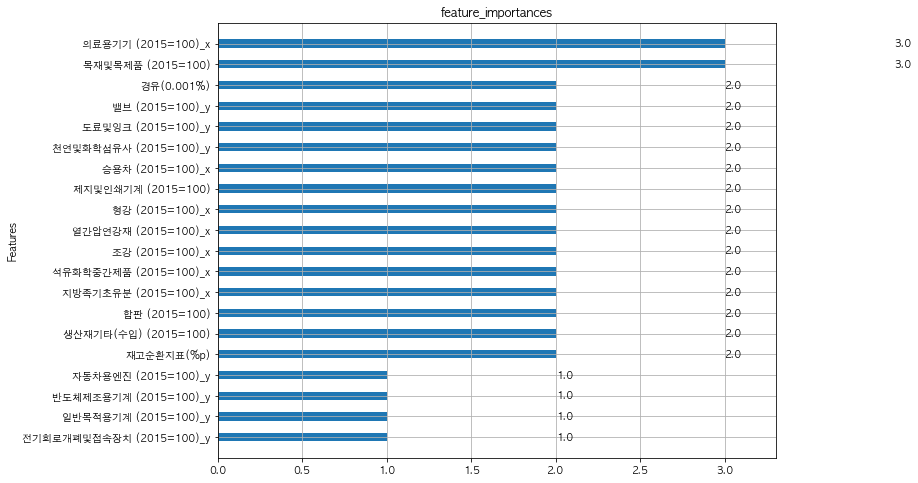

In [354]:
from xgboost import XGBClassifier
import xgboost

model = XGBClassifier(gamma=3, learning_rate=0.3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))

fig, ax = plt.subplots(1,1,figsize=(10,8))
plt.rcParams['font.family'] = 'AppleGothic'
xgboost.plot_importance(model, title='feature_importances', xlabel='', ax=ax, max_num_features=20, height=0.4)
# xgboost.plot_importance(xgb, title='feature_importances', xlabel='', grid=False, ax=ax)

plt.show()

(236, 475)
(60, 475)
1.0    0.588983
0.0    0.411017
Name: label, dtype: float64
1.0    0.583333
0.0    0.416667
Name: label, dtype: float64
정확도 :  0.6666666666666666
목재 (2015=100)                 0.184244
베어링,기어및동력전달장치 (2015=100)_y    0.085076
운동및경기용품 (2015=100)            0.077137
가정용전기기기 (2015=100)            0.073753
지방족기초유분 (2015=100)_y          0.057432
측정및분석기기 (2015=100)_y          0.052736
음료품 (2015=100)                0.052612
경제심리지수(순환변동치)                 0.049801
합성고무 (2015=100)_x             0.049554
디스플레이제조용기계 (2015=100)_y       0.044231
dtype: float64


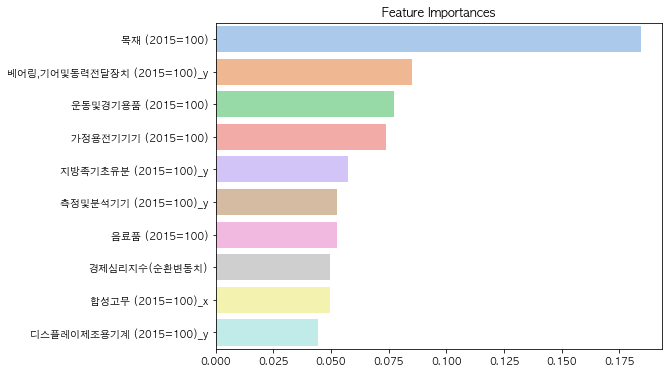

In [273]:
'''
# 데이터 불러오기 및 날짜 인덱스 지정
df = pd.read_csv('data/10_emart - 동행&후행.csv') # 파일 경로를 수정해주세요
df.date = pd.to_datetime(df.date)
df = df.set_index('date')
df = df.drop(['k_s - p_s'], axis=1)
'''

from sklearn.tree import DecisionTreeClassifier

# train, test split (8:2)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,6:], df['label'], test_size=0.2, random_state=42)
train_cnt = y_train.count()
test_cnt = y_test.count()
print(X_train.shape)
print(X_test.shape)

# 0,1이 고르게 나누어졌을까?
print(y_train.value_counts()/train_cnt)
print(y_test.value_counts()/test_cnt)

# CART 모델 학습
model = DecisionTreeClassifier(max_depth=8, random_state=1)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)
print('정확도 : ', accuracy_score(y_pred, y_test))

# feature importance 확인
ftr_importances = pd.Series(model.feature_importances_, index = X_train.columns)

ftr_top5 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.rcParams['font.family'] = 'AppleGothic'
plt.title('Feature Importances') # 그래프 제목을 변경해주세요
sns.barplot(x=ftr_top5, y=ftr_top5.index, palette='pastel')
print(ftr_top5)
plt.show()

In [278]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(df)
plt.title('Heatmap of Flight by seaborn', fontsize=20)
plt.show()

ValueError: could not convert string to float: '2000-01'

<Figure size 1440x1440 with 0 Axes>

- 이런 식으로 상위에 뜬 feature만 selection해서 새로운 데이터 프레임을 만듭니다(액셀 작업 추천)
- accuracy가 0.7 이 넘는 데이터에서 나온 feature를 넣는게 좋았던 것 같습니다.

(44, 13)
(12, 13)
1    0.659091
0    0.340909
Name: downturn, dtype: float64
0    0.5
1    0.5
Name: downturn, dtype: float64
정확도 :  0.8333333333333334


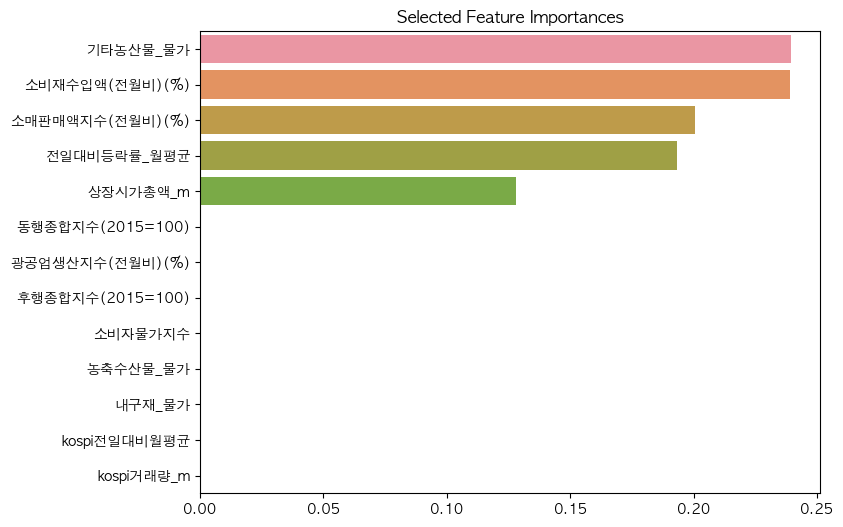

In [17]:
# 데이터 불러오기 및 날짜 인덱스 지정
df = pd.read_csv('data/10_emart - selection.csv')
df.date = pd.to_datetime(df.date)
df = df.set_index('date')
df = df.drop(['k_s - p_s'], axis=1)

from sklearn.tree import DecisionTreeClassifier

# train, test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df['downturn'], test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print(X_train.shape)
print(X_test.shape)

print(y_train.value_counts()/train_cnt)
print(y_test.value_counts()/test_cnt)

# CART 모델
model = DecisionTreeClassifier(max_depth=4, random_state=1)
model.fit(X_train, y_train)
# model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
print('정확도 : ',accuracy_score(y_pred, y_test))

ftr_importances = pd.Series(model.feature_importances_, index = X_train.columns)

ftr_top5 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.rcParams['font.family'] = 'AppleGothic'
plt.title('Selected Feature Importances')
sns.barplot(x=ftr_top5, y=ftr_top5.index)
plt.show()

#### 하락 팩터 찾기

In [ ]:
## feature selection된 데이터 MinMaxScaling

# 데이터 불러오기 및 날짜 인덱스 지정
df_apr_f = pd.read_csv('data/9_에이피알 - features.csv')
df_apr_f.date = pd.to_datetime(df_apr_f.date)
df_apr_f = df_apr_f.ffill()
# df = df_apr_f.drop(['생산자제품재고지수','신선어개류 물가'], axis=1)
# df_onlyfeat = df_apr_f.drop(['emart_close', 'kospi_close', 'emartMinMax', 'kospiMinMax', 'k-p_diff', 'k_p10'], axis=1)
df_apr_f = df_apr_f.set_index('date')
df_apr_ff = df_apr_f.drop('소비자 거래지수', axis=1)

# MinMaxScaler로 price, kospi 데이터 정규화
scaler = MinMaxScaler()
scaler.fit(df_apr_ff)
scaled = scaler.transform(df_apr_ff)
df_scaled = pd.DataFrame(scaled, columns=['생산자제품재고지수(전월비)(%)','신선어개','트래픽','소비자 거래건수'])

# 정규화한 데이터에 날짜 열 추가
# df_onlyfeat = df_onlyfeat.reset_index()
df_scaled.insert(0,'date', df['date'] )

# 원본데이터에 merge
df_apr_f = df_apr_f.drop(df_apr_f.iloc[:,:4], axis=1)
df_apr_f = df_apr_f.reset_index()
df_apr_f = df_apr_f.merge(df_scaled, how='left')

df_apr_f = df.merge(df_apr_f, how='left')

df_apr_f.head()